In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the data

df = pd.read_csv("EducationPost12thStandard.csv")
df.head(5)

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Names,777,777,Stephens College,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apps,777,NaN,NaN,NaN,3001.64,3870.2,81,776,1558,3624,48094
Accept,777,NaN,NaN,NaN,2018.8,2451.11,72,604,1110,2424,26330
Enroll,777,NaN,NaN,NaN,779.973,929.176,35,242,434,902,6392
Top10perc,777,NaN,NaN,NaN,27.5586,17.6404,1,15,23,35,96
Top25perc,777,NaN,NaN,NaN,55.7967,19.8048,9,41,54,69,100
F.Undergrad,777,NaN,NaN,NaN,3699.91,4850.42,139,992,1707,4005,31643
P.Undergrad,777,NaN,NaN,NaN,855.299,1522.43,1,95,353,967,21836
Outstate,777,NaN,NaN,NaN,10440.7,4023.02,2340,7320,9990,12925,21700
Room.Board,777,NaN,NaN,NaN,4357.53,1096.7,1780,3597,4200,5050,8124


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [5]:
#Check for missing values
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [6]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Univariate Analysis

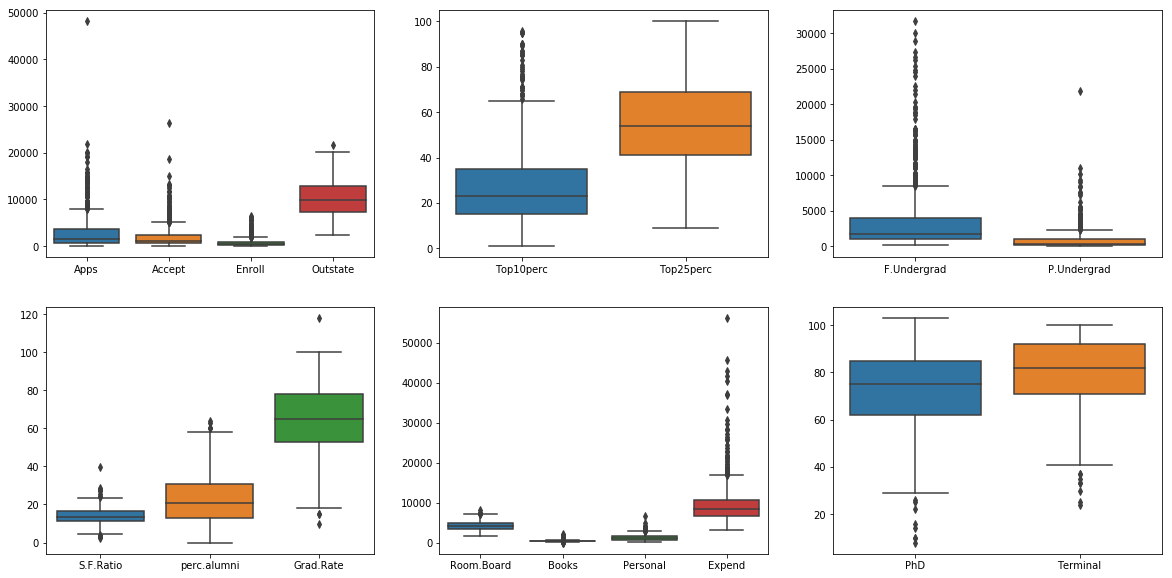

In [7]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
a = sns.boxplot(data=df[['Apps','Accept','Enroll','Outstate']] ,
                orient = "v" , ax=axes[0][0])


b = sns.boxplot(data=df[['Top10perc','Top25perc']] ,
                orient = "v" , ax=axes[0][1])


c = sns.boxplot(data=df[['F.Undergrad','P.Undergrad']]
                , orient = "v" , ax=axes[0][2])

d = sns.boxplot(data=df[['S.F.Ratio', 'perc.alumni', 'Grad.Rate']]
                , orient = "v" , ax=axes[1][0])

e = sns.boxplot(data=df[['Room.Board', 'Books','Personal','Expend']]
                , orient = "v" , ax=axes[1][1])


f = sns.boxplot(data=df[['PhD', 'Terminal']]
                , orient = "v" , ax=axes[1][2])


plt.show()

## Perform bi variate analysis including correlation and heatmap

In [8]:
# Check for correlation of variable
df.corr(method='pearson')

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


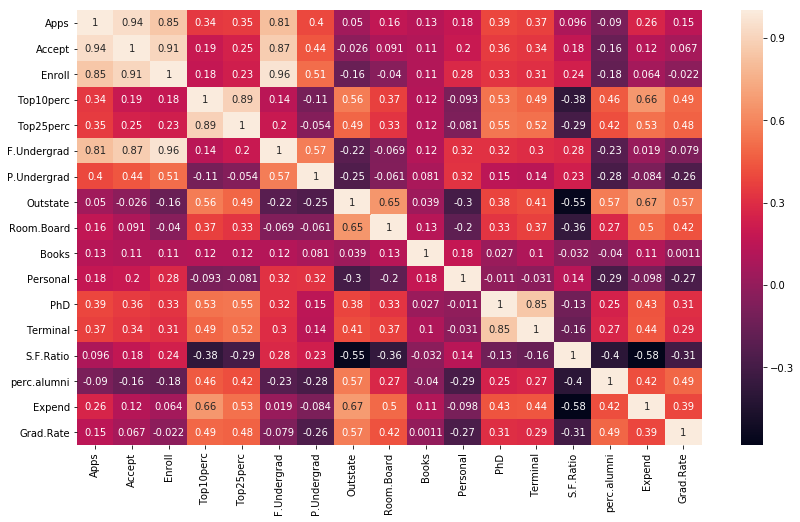

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

Looking at the heatmap we can say that :

Number of applications accepted is highly correlated with number of applications received
Number of new students enrolled is highly correlated with number of applications accepted
Number of Full Time undergraduate students is highly correlated with number of students enrolled
Percentage of faculties with terminal degree is highly correlated with percentage of faculties with PH.D.s'

We can also observe negative correlations between :

S.F.Ratio and Outstate
S.F.Ratio and Expend
S.F.Ratio and Top10perc


## Scaling and Dealing with Outliers

In [10]:
# Since name is not reqquired for PCA, we will drop the column

df_scale=df.drop(['Names'], axis =1)
df_scale.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
# Scaling

from scipy.stats import zscore
df_scale=df_scale.apply(zscore)
df_scale.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


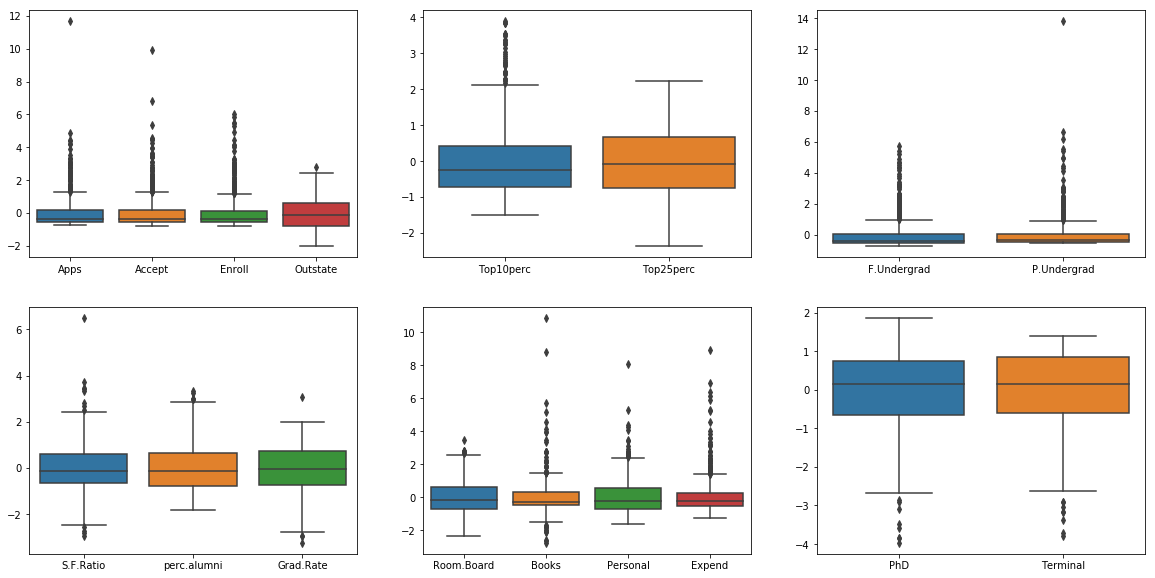

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
a = sns.boxplot(data=df_scale[['Apps','Accept','Enroll','Outstate']] ,
                orient = "v" , ax=axes[0][0])


b = sns.boxplot(data=df_scale[['Top10perc','Top25perc']] ,
                orient = "v" , ax=axes[0][1])


c = sns.boxplot(data=df_scale[['F.Undergrad','P.Undergrad']]
                , orient = "v" , ax=axes[0][2])


d = sns.boxplot(data=df_scale[['S.F.Ratio', 'perc.alumni', 'Grad.Rate']]
                , orient = "v" , ax=axes[1][0])


e = sns.boxplot(data=df_scale[['Room.Board', 'Books','Personal','Expend']]
                , orient = "v" , ax=axes[1][1])


f = sns.boxplot(data=df_scale[['PhD', 'Terminal']]
                , orient = "v" , ax=axes[1][2])



plt.show()

After Comparing the boxplots before and after scaling, we can see that the outliers still remain and there is no significant different on the outliers by Scaling. The outliers will have to be treated separately. 

### Dealing with Outliers

In [13]:
Q1 = df_scale.quantile(0.25)
Q3 = df_scale.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Apps           0.736353
Accept         0.742998
Enroll         0.710764
Top10perc      1.134494
Top25perc      1.414711
F.Undergrad    0.621583
P.Undergrad    0.573137
Outstate       1.394131
Room.Board     1.325741
Books          0.787883
Personal       1.256215
PhD            1.409517
Terminal       1.427321
S.F.Ratio      1.263966
perc.alumni    1.453509
Expend         0.781656
Grad.Rate      1.456312
dtype: float64


In [14]:
np.where((df_scale < (Q1 - 1.5 * IQR)) | (df_scale > (Q3 + 1.5 * IQR)))

(array([  1,   3,   4,   4,  16,  16,  16,  18,  20,  21,  21,  21,  23,
         23,  23,  23,  23,  27,  27,  27,  34,  37,  38,  39,  39,  39,
         47,  54,  59,  59,  59,  59,  59,  60,  60,  60,  61,  61,  61,
         61,  63,  64,  69,  69,  69,  69,  70,  70,  70,  71,  71,  72,
         78,  79,  85,  86,  86,  86,  87,  87,  87,  91,  91,  91,  95,
         95, 100, 100, 102, 106, 114, 114, 118, 118, 118, 118, 118, 133,
        137, 138, 141, 141, 141, 141, 142, 144, 144, 152, 158, 158, 158,
        159, 159, 170, 174, 174, 174, 176, 176, 176, 176, 177, 181, 181,
        189, 191, 191, 191, 201, 201, 201, 201, 203, 203, 203, 203, 203,
        218, 218, 221, 221, 221, 222, 222, 222, 222, 223, 223, 226, 226,
        226, 232, 233, 237, 242, 242, 250, 250, 250, 251, 251, 257, 257,
        264, 269, 269, 269, 269, 273, 273, 274, 274, 274, 274, 274, 275,
        277, 277, 277, 277, 278, 279, 279, 279, 279, 280, 284, 284, 284,
        284, 288, 288, 295, 298, 301, 303, 311, 317

In [15]:
df_pca = df_scale.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df_pca < Q1 - 1.5 * IQR)[0], np.where(df_pca < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df_pca.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df_pca > Q3 + 1.5 * IQR)[0], np.where(df_pca > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df_pca.iloc[i,j] = whisker[j]

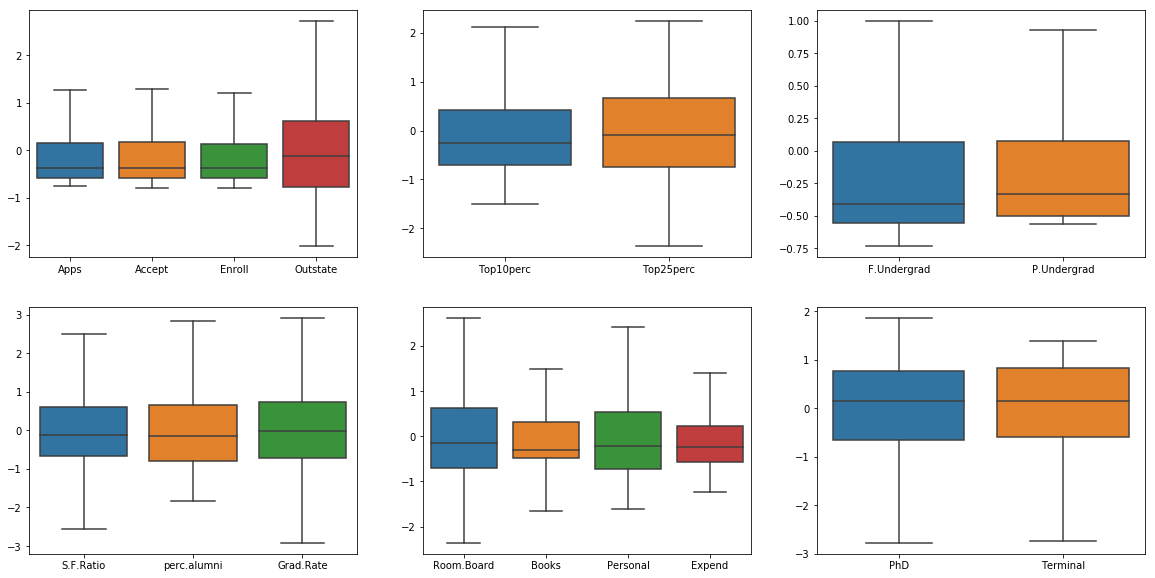

In [16]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 10)
a = sns.boxplot(data=df_pca[['Apps','Accept','Enroll','Outstate']] ,
                orient = "v" , ax=axes[0][0])


b = sns.boxplot(data=df_pca[['Top10perc','Top25perc']] ,
                orient = "v" , ax=axes[0][1])


c = sns.boxplot(data=df_pca[['F.Undergrad','P.Undergrad']]
                , orient = "v" , ax=axes[0][2])





e = sns.boxplot(data=df_pca[['Room.Board', 'Books','Personal','Expend']]
                , orient = "v" , ax=axes[1][1])


f = sns.boxplot(data=df_pca[['PhD', 'Terminal']]
                , orient = "v" , ax=axes[1][2])


d = sns.boxplot(data=df_pca[['S.F.Ratio', 'perc.alumni', 'Grad.Rate']]
                , orient = "v" , ax=axes[1][0])

plt.show()

## PCA

In [17]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(df_pca.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 3.92202587e-01  3.72045278e-01  3.44861102e-01  1.77882547e-01
   2.28413447e-01  3.00372860e-01  1.53261035e-01  4.09309446e-02
   1.16838149e-01  1.03276949e-01  1.29720101e-01  2.84046975e-01
   2.67661215e-01  7.57322866e-02 -6.30526007e-02  9.90236070e-02
   9.43096150e-02]
 [ 3.72045278e-01  3.86719034e-01  3.57101106e-01  1.22742172e-01
   1.70302604e-01  3.10747826e-01  1.67663695e-01 -3.11176328e-03
   7.40055439e-02  9.06387432e-02  1.43597630e-01  2.59812502e-01
   2.46777922e-01  1.12140752e-01 -1.02443762e-01  6.54924734e-02
   4.90474515e-02]
 [ 3.44861102e-01  3.57101106e-01  3.76969419e-01  9.32127566e-02
   1.41572482e-01  3.30838988e-01  1.85453496e-01 -9.55996485e-02
  -1.45695116e-02  8.66382517e-02  1.87681520e-01  2.29023882e-01
   2.14034520e-01  1.61090704e-01 -1.36102632e-01  2.16676723e-02
  -1.42555842e-02]
 [ 1.77882547e-01  1.22742172e-01  9.32127566e-02  7.81305061e-01
   8.08308058e-01  5.47613345e-02 -7.49074558e-02  4.97059995e-

In [18]:
# Identify Eigen Values and Eigen Vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.0929684   0.32104652  0.06660652 -0.0129432   0.24674827 -0.00650339
   0.2400326  -0.13180129 -0.01773119 -0.03400089  0.14346037 -0.59269472
   0.5569348   0.03784437  0.22445438  0.11116423 -0.00914552]
 [ 0.06592707  0.3319699   0.07883241 -0.03420729  0.22877472 -0.02487384
   0.27288698 -0.12917757 -0.0195307  -0.06133927 -0.32336365  0.70710813
   0.26755069  0.00907891  0.17576693  0.15058739  0.00281244]
 [ 0.03166929  0.35033549  0.01381154 -0.01122623  0.19114851 -0.03094669
   0.26523924 -0.12023338 -0.00760842 -0.00639234  0.69930928  0.13493584
  -0.49315933 -0.01188448  0.04255122  0.01589244  0.02985794]
 [ 0.33452816  0.06754279 -0.32328505  0.21141739  0.07741651  0.32096376
  -0.09974811  0.02170441  0.13379303 -0.00700079 -0.0310452   0.02159112
   0.00901027  0.08516089  0.14064341 -0.29511711  0.69375696]
 [ 0.36427546  0.13142781 -0.41399578  0.19443136  0.11797053  0.37686172
  -0.18713202  0.01531995  0.18486533  0.12749803  0.00890279  0

In [19]:
# Find variance and cummulative variance by each eigen vector

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print("Each Var ", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n Cumulative Variance Explained", cum_var_exp)

Each Var  [39.596786084613946, 19.816640778597712, 7.368309987818127, 6.781838775940499, 6.03002745094933, 4.386813915330764, 3.9929930316310163, 3.424290996069485, 3.049000976613329, 1.9934514926470919, 1.0777015004826385, 0.8118922891946114, 0.6818991367781234, 0.5044826172095537, 0.29824649401548475, 0.11951825281272575, 0.06610621929555406]

 Cumulative Variance Explained [ 39.59678608  59.41342686  66.78173685  73.56357563  79.59360308
  83.98041699  87.97341002  91.39770102  94.446702    96.44015349
  97.51785499  98.32974728  99.01164642  99.51612903  99.81437553
  99.93389378 100.        ]


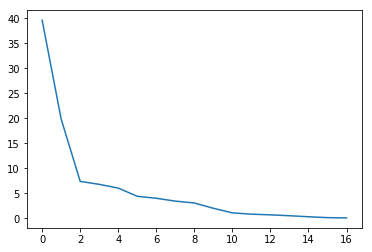

In [20]:
plt.plot(var_exp)

Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
We will proceed with 8 components here for 90% variation

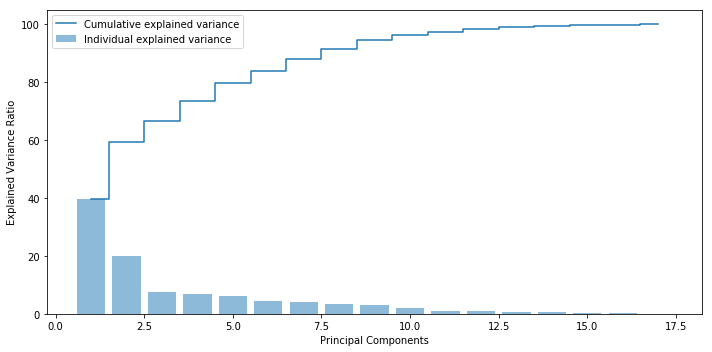

In [21]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [31]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 17 to 8)

pca = PCA(n_components=8)
data_reduced = pca.fit_transform(df_pca)
data_reduced.transpose()

array([[-1.68925782, -1.81506756, -1.00464371, ..., -0.66446845,
         5.94790152, -0.38662605],
       [ 0.82654612, -1.75137948, -1.5398626 , ...,  0.00677737,
         0.41252047,  0.43267952],
       [-0.62471732,  2.4164196 , -0.40778359, ..., -0.42979899,
         0.12032084, -1.69574496],
       ...,
       [ 0.26571045, -0.17243938, -0.08295623, ..., -1.15034145,
         1.05625824,  0.75185601],
       [ 0.41409853,  0.42976432, -0.81255837, ...,  0.16313136,
        -0.25090762,  0.42392907],
       [-0.99425593,  1.48511993,  0.33969235, ...,  0.86277424,
        -0.01216518, -0.72584273]])

In [32]:
pca.components_

array([[ 0.0929684 ,  0.06592707,  0.03166929,  0.33452816,  0.36427546,
         0.01149875, -0.04622402,  0.37830181,  0.29777508,  0.0401252 ,
        -0.10944135,  0.31241468,  0.31563577, -0.238936  ,  0.28566756,
         0.24699418,  0.31117828],
       [ 0.32104652,  0.3319699 ,  0.35033549,  0.06754279,  0.13142781,
         0.32452837,  0.20972858, -0.20665209, -0.07383062,  0.13395669,
         0.29386253,  0.30728219,  0.28923834,  0.27738993, -0.26160327,
        -0.02920582, -0.12680266],
       [ 0.06660652,  0.07883241,  0.01381154, -0.32328505, -0.41399578,
         0.02193807,  0.1038968 ,  0.2446006 ,  0.65435548,  0.06932308,
         0.02906196,  0.01051885,  0.07534077, -0.19726187, -0.35032544,
         0.14253472, -0.14343185],
       [-0.0129432 , -0.03420729, -0.01122623,  0.21141739,  0.19443136,
        -0.01744947, -0.02676078,  0.02000679, -0.07736692,  0.29066279,
         0.60616613, -0.21336602, -0.22034156, -0.50833033, -0.05443422,
         0.17754101

In [33]:
# Find correlation between components and features

df_comp = pd.DataFrame(pca.components_,columns=list(df_pca))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.092968,0.065927,0.031669,0.334528,0.364275,0.011499,-0.046224,0.378302,0.297775,0.040125,-0.109441,0.312415,0.315636,-0.238936,0.285668,0.246994,0.311178
1,0.321047,0.331970,0.350335,0.067543,0.131428,0.324528,0.209729,-0.206652,-0.073831,0.133957,0.293863,0.307282,0.289238,0.277390,-0.261603,-0.029206,-0.126803
2,0.066607,0.078832,0.013812,-0.323285,-0.413996,0.021938,0.103897,0.244601,0.654355,0.069323,0.029062,0.010519,0.075341,-0.197262,-0.350325,0.142535,-0.143432
3,-0.012943,-0.034207,-0.011226,0.211417,0.194431,-0.017449,-0.026761,0.020007,-0.077367,0.290663,0.606166,-0.213366,-0.220342,-0.508330,-0.054434,0.177541,-0.264098
4,0.246748,0.228775,0.191149,0.077417,0.117971,0.150299,0.069900,0.046406,0.205895,0.054402,-0.013263,-0.442567,-0.484983,0.128203,-0.087313,-0.065771,0.543795


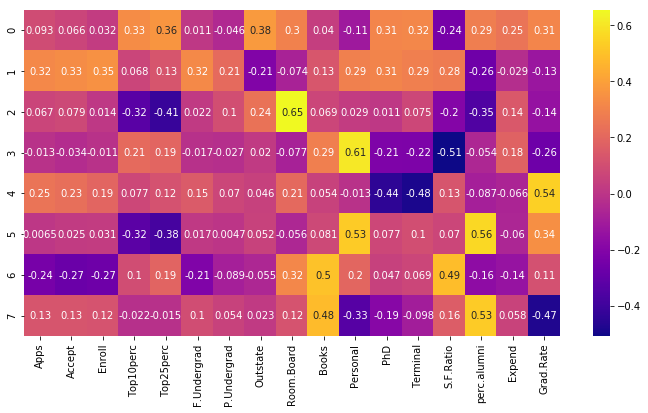

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',annot = True)

In [35]:
series1=df_comp.iloc[0]
series1

Apps           0.092968
Accept         0.065927
Enroll         0.031669
Top10perc      0.334528
Top25perc      0.364275
F.Undergrad    0.011499
P.Undergrad   -0.046224
Outstate       0.378302
Room.Board     0.297775
Books          0.040125
Personal      -0.109441
PhD            0.312415
Terminal       0.315636
S.F.Ratio     -0.238936
perc.alumni    0.285668
Expend         0.246994
Grad.Rate      0.311178
Name: 0, dtype: float64